In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os


In [2]:
# Change this path to run in your machine
home_path = 'C:/Users/54911/OneDrive/Documentos/git_repos/elecciones2023-arg'

In [3]:
os.chdir(home_path)

In [4]:
political_posts = pd.read_csv('Elecciones + IA/modeling/Preparando_datos/political_posts.csv')


In [5]:
primera_vuelta_poly = pd.read_csv('Elecciones + IA/modeling/polynomial_surveys/data_built/normalize_primera_vuelta_poly.csv')
ballotaje_poly = pd.read_csv('Elecciones + IA/modeling/polynomial_surveys/data_built/normalize_ballotage_poly.csv')

In [6]:
political_posts['fecha'] = pd.to_datetime(political_posts['fecha'])
primera_vuelta_poly['Final'] = pd.to_datetime(primera_vuelta_poly['Final'])
primera_vuelta_poly['Inicio'] = pd.to_datetime(primera_vuelta_poly['Inicio'])

Let's see how the post is distribuided in each date range

In [7]:
amount_posts = np.zeros(len(primera_vuelta_poly))
for i in range (len(primera_vuelta_poly)):
    indx_row = i
    start = primera_vuelta_poly.iloc[indx_row]['Inicio']
    end = primera_vuelta_poly.iloc[indx_row]['Final']
    aux = political_posts[(political_posts['fecha']>start)& (political_posts['fecha']<end)]
    amount_posts[i] = len(aux)

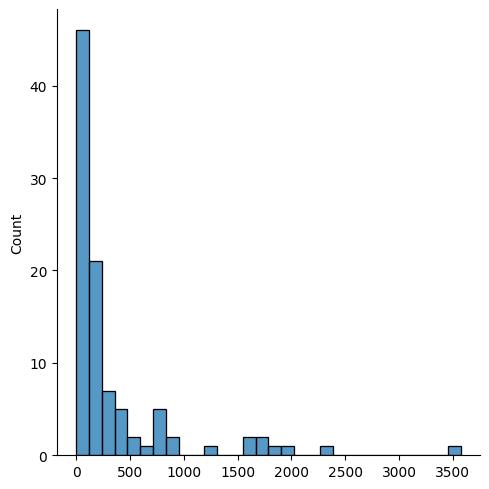

In [8]:
sns.displot(amount_posts)

In [9]:
amount_max = np.quantile(amount_posts,0.95)
amount_min = np.quantile(amount_posts,0.1)
filtered_index =  np.nonzero((amount_posts>amount_min) & (amount_posts<amount_max))
primera_vuelta_poly_filtered = primera_vuelta_poly.iloc[filtered_index]

fuente -> oneHotEncoding

fecha -> day,month,year (?)

cantidad_likes -> mean values

amount_post?

In [16]:
amount_posts = np.zeros(len(ballotaje_poly))
for i in range (len(ballotaje_poly)):
    indx_row = i
    start = ballotaje_poly.iloc[indx_row]['Inicio']
    end = ballotaje_poly.iloc[indx_row]['Final']
    aux = political_posts[(political_posts['fecha']>start)& (political_posts['fecha']<end)]
    amount_posts[i] = len(aux)

amount_max = np.quantile(amount_posts,0.95)
amount_min = np.quantile(amount_posts,0.1)
filtered_index =  np.nonzero((amount_posts>amount_min) & (amount_posts<amount_max))
ballotaje_poly_poly_filtered = ballotaje_poly.iloc[filtered_index]

In [19]:
len(ballotaje_poly_poly_filtered)

13

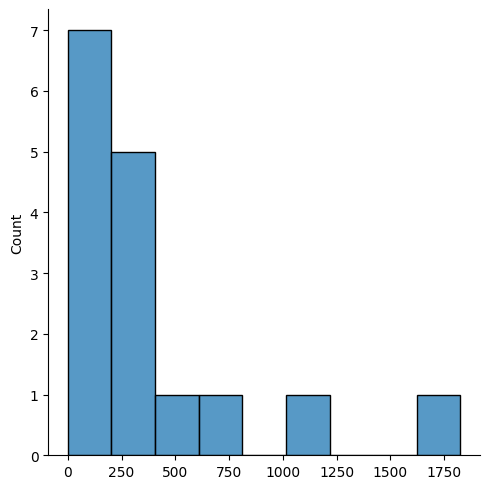

In [17]:
sns.displot(amount_posts)

In [12]:
data_structured_1 = pd.read_csv('Elecciones + IA\modeling\Preparando_datos\data_structured_1.csv')

In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler 

In [15]:
def scale_datasets(x_train, x_test):
    min_max = MinMaxScaler()
    x_train_scaled = pd.DataFrame(
        min_max.fit_transform(x_train),
        columns=x_train.columns
    )
    x_test_scaled = pd.DataFrame(
        min_max.transform(x_test),
        columns = x_test.columns
    )
    return x_train_scaled, x_test_scaled,min_max